In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
years=[i for i in range(2000,2025)]
cpu_returns=[]
gpu_returns=[]
cpu_linear_corr=[]
gpu_linear_corr=[]
cpu_dynamic_corr=[]
gpu_dynamic_corr=[]
datasize=[]

In [3]:
for i in years:
    data=pd.read_csv(os.path.join(os.getcwd(),'datasets',f'data'+str(i)+'.csv'),index_col='Date')
    datasize.append(data.size)
    
    cpu_returns_dataset=pd.read_csv(os.path.join(os.getcwd(),'cpu_returns',f'cpu_returns_{i}.csv'),index_col='ticker')
    cpu_returns.append(cpu_returns_dataset)

    gpu_returns_dataset=pd.read_csv(os.path.join(os.getcwd(),'gpu_returns',f'gpu_returns_{i}.csv'),index_col='ticker')
    gpu_returns.append(gpu_returns_dataset)

    cpu_linear_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'cpu_linear',f'linear_data_corr_cpu_{i}.csv'),index_col='ticker')
    cpu_linear_corr.append(cpu_linear_corr_dataset)

    gpu_linear_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'gpu_linear',f'linear_data_corr_gpu_{i}.csv'),index_col='ticker')
    gpu_linear_corr.append(gpu_linear_corr_dataset)

    cpu_dynamic_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'cpu_dynamic',f'cpu_dynamic_data_corr_{i}.csv'),index_col='ticker')
    cpu_dynamic_corr.append(cpu_dynamic_corr_dataset)

    gpu_dynamic_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'gpu_dynamic',f'gpu_dynamic_data_corr_{i}.csv'),index_col='ticker')
    gpu_dynamic_corr.append(gpu_dynamic_corr_dataset)


In [4]:
cpu_returns_time=[20.0706,21.3553,22.0078,22.3669,23.7126,24.3581,25.6324,27.3486,28.8418,29.0795,30.7743,30.8347,32.3975,32.0648,33.7037,35.7795,38.6041,40.8604,42.5592,45.2907,46.4643,53.2872,58.6148,60.7918,52.5077]
gpu_returns_time=[0.2021,0.08175,0.0809,0.0816,0.0817,0.0808,0.08705,0.0823,0.0818,0.0818,0.0821,0.0811,0.0824,0.1690,0.0612,0.0614,0.0815,0.0822,0.0827,0.0821,0.0819,0.0836,0.0856,0.2193,0.2086]
cpu_linear_corr_time=[18.5314,20.69,22.2095,23.3838,25.87,28.0559,30.4388,33.5746,37.479,38.2998,41.5429,44.595,47.97153,51.638,57.978,62.968,70.079,76.228,85.322,96.95,106.226,137.59,170.0395,181.2867,197.451]
gpu_linear_corr_time=[0.1094,0.1295,0.11086,0.1152,0.13922,0.1459,0.1479,0.1745,0.1598,0.1625,0.1736,0.1769,0.1776,0.212,0.202,0.209,0.2314,0.2237,0.277,0.26,0.2797,0.35,0.3974,0.40614,0.385]
cpu_res_time=[23.40,23.7595,25.060,25.7146,27.2657,28.5699,29.7696,31.4316,32.7538,33.14144,34.4576,36.0914,37.056997,38.387,40.731,42.8263,44.426,46.281,49.276,53.130,55.080,62.303,68.889,72.0639,64.92]
gpu_res_time=[0.6866,0.6414,0.675,0.6915,0.84402,0.7530,0.7854,0.84,0.8666,1.06,0.92625,1.14,0.998,1.08,1.144,1.21,1.1711,1.39,1.48,1.397,1.45,1.677,2.07,1.99,1.88,]
cpu_dynamic_corr_time=[277.93,294.091,317,325.8955,358.366,399.211,432.7676,492.298,519.7529,549.6976,586.212,625.340,671.2155,736.002,800.770,896.875,979.4041,1070.8489,1209.4574,1339.39,1493.42,1917.247,2315.7114,2510.6569,2722.71]
gpu_dynamic_corr_time=[0.4607,0.058,0.0583,0.0576,0.0575,0.0585,0.05805,0.0477,0.0582,0.0584,0.0586,0.059,0.048,0.047,0.0465,0.059,0.058,0.059,0.058,0.0586,0.059,0.0620,0.06125,0.0520,0.055]

In [5]:
print(len(cpu_returns_time))
print(len(gpu_returns_time))
print(len(cpu_linear_corr_time))
print(len(gpu_linear_corr_time))
print(len(cpu_res_time))
print(len(gpu_res_time))
print(len(cpu_dynamic_corr_time))
print(len(cpu_dynamic_corr_time))

25
25
25
25
25
25
25
25


In [6]:
def plot_cpu_gpu(datasize, year, cpu_returns_time, gpu_returns_time,xbar='CPU Returns Time',ybar='GPU Returns Time(x20 for visualization)',title="GPU vs CPU Returns Calculation"):
    datasize = np.array(datasize)
    year = np.array(year)
    cpu_returns_time = np.array(cpu_returns_time)
    gpu_returns_time = np.array(gpu_returns_time)

    x = np.arange(len(year))
    bar_width = 0.4  
    
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar(x - bar_width / 2, cpu_returns_time, bar_width, label=xbar, color='blue', alpha=0.7)
    ax.bar(x + bar_width / 2, gpu_returns_time, bar_width, label=ybar, color='green', alpha=0.7)

    x_labels = [f"Year: {y} Size: {s}" for y, s in zip(year, datasize)]

    ax.set_xlabel("Year and Data size", fontsize=12)
    ax.set_ylabel("Time (sec)", fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=10)

    ax.legend(fontsize=10)

    plt.tight_layout()

    plt.show()


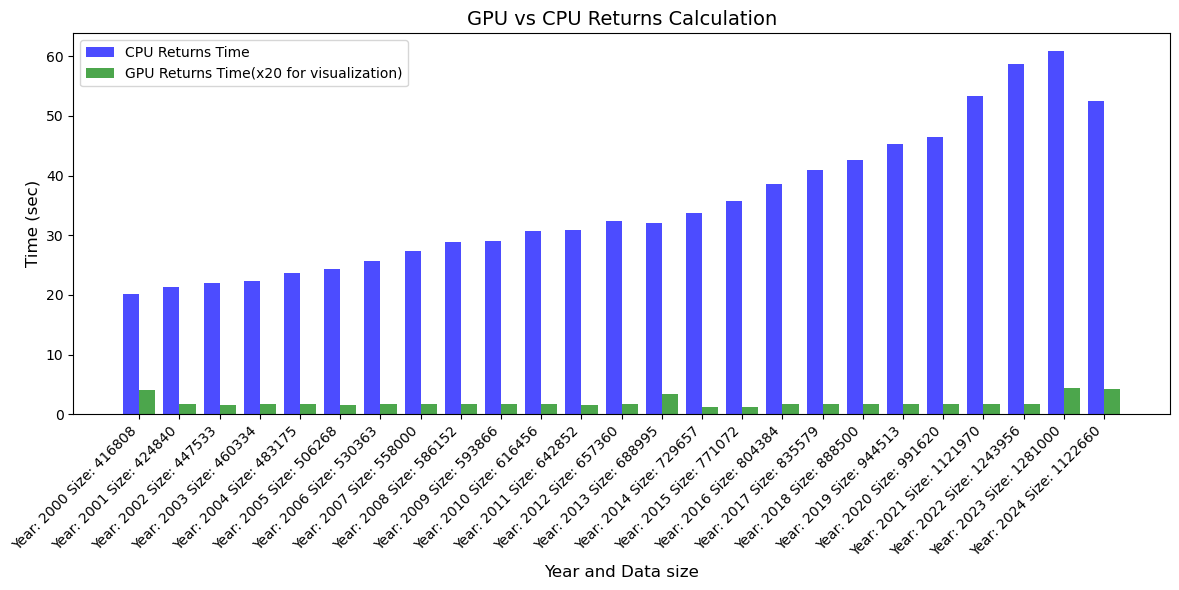

In [7]:
gpu_returns_time_20x=[i*20 for i in gpu_returns_time]
plot_cpu_gpu(datasize,years,cpu_returns_time,gpu_returns_time_20x)

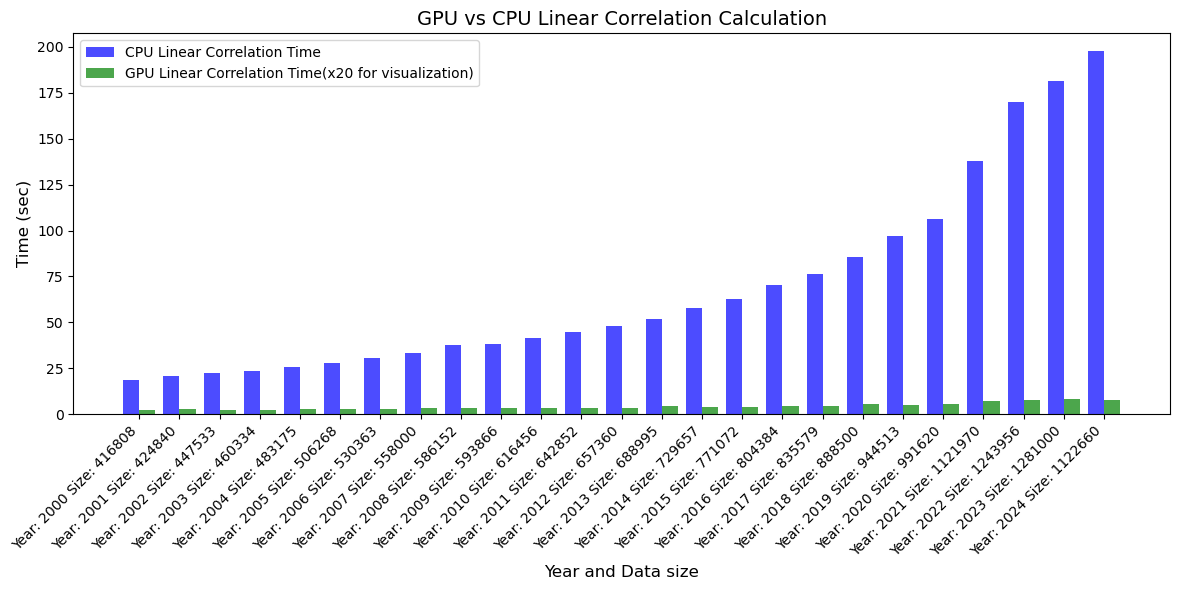

In [8]:
gpu_linear_corr_time_20x=[i*20 for i in gpu_linear_corr_time]
plot_cpu_gpu(datasize,years,cpu_linear_corr_time,gpu_linear_corr_time_20x,xbar='CPU Linear Correlation Time',ybar='GPU Linear Correlation Time(x20 for visualization)',title="GPU vs CPU Linear Correlation Calculation")

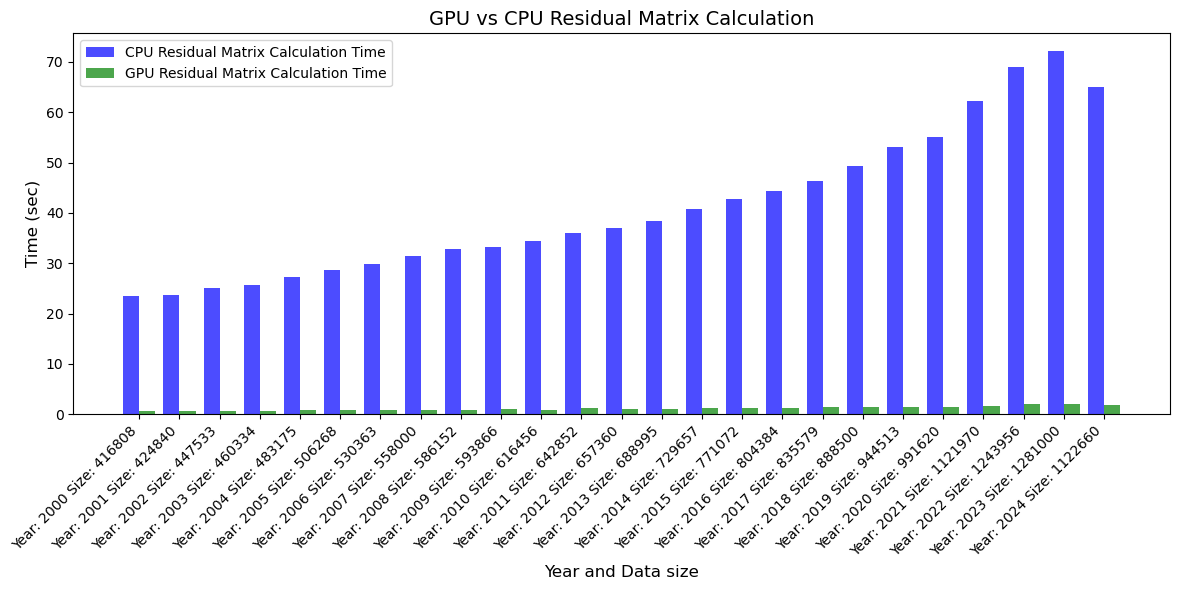

In [9]:
plot_cpu_gpu(datasize,years,cpu_res_time,gpu_res_time,xbar='CPU Residual Matrix Calculation Time',ybar='GPU Residual Matrix Calculation Time',title="GPU vs CPU Residual Matrix Calculation")

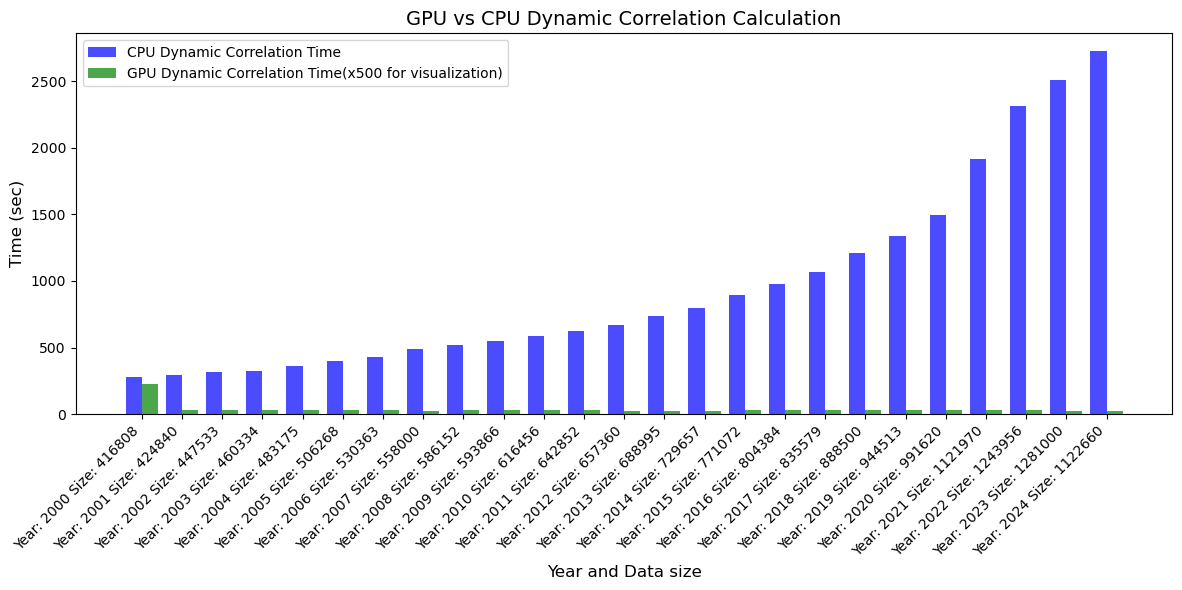

In [10]:
gpu_dynamic_corr_time_500x=[i*500 for i in gpu_dynamic_corr_time]
plot_cpu_gpu(datasize,years,cpu_dynamic_corr_time,gpu_dynamic_corr_time_500x,xbar='CPU Dynamic Correlation Time',ybar='GPU Dynamic Correlation Time(x500 for visualization)',title="GPU vs CPU Dynamic Correlation Calculation")

In [11]:
def general_plot_func(data_cpu, data_gpu, title, xlabel, ylabel):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    
    data_cpu.plot(ax=axes[0], color='green', label=data_cpu.columns[0] + ' CPU')
    axes[0].set_title(f'{title} - CPU')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    axes[0].legend()

    data_gpu.plot(ax=axes[1], color='red', label=data_gpu.columns[0] + ' GPU')
    axes[1].set_title(f'{title} - GPU')
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)
    axes[1].legend()

    plt.tight_layout()
    plt.show()


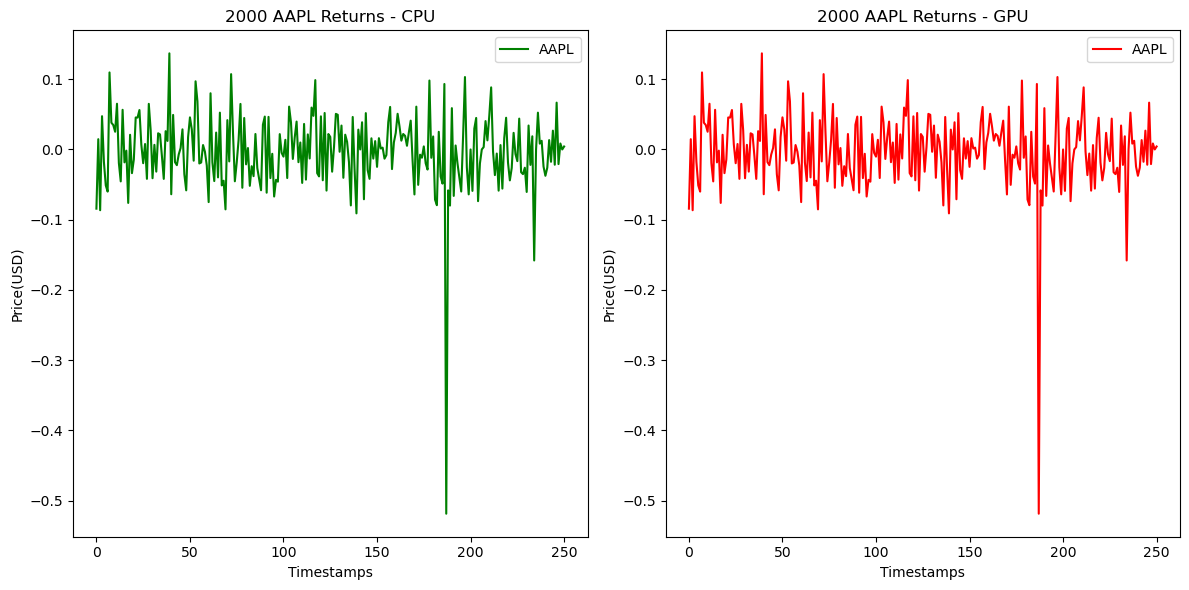

In [12]:
general_plot_func(cpu_returns[0].loc[:,['AAPL']],gpu_returns[0].loc[:,['AAPL']],'2000 AAPL Returns','Timestamps','Price(USD)')

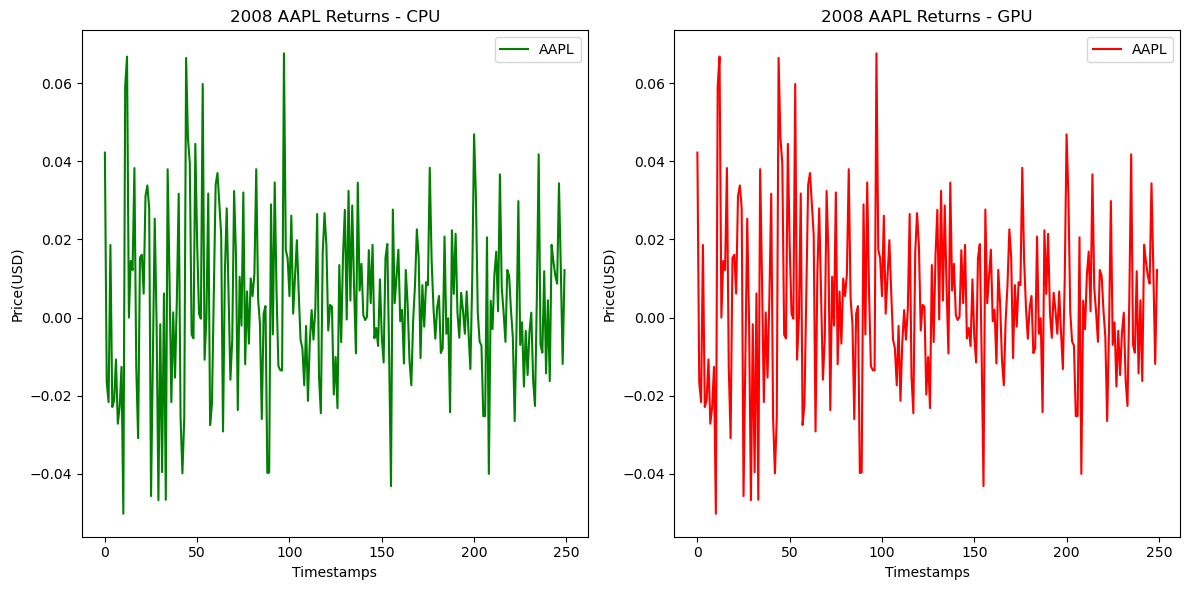

In [13]:
general_plot_func(cpu_returns[9].loc[:,['AAPL']],gpu_returns[9].loc[:,['AAPL']],'2008 AAPL Returns','Timestamps','Price(USD)')

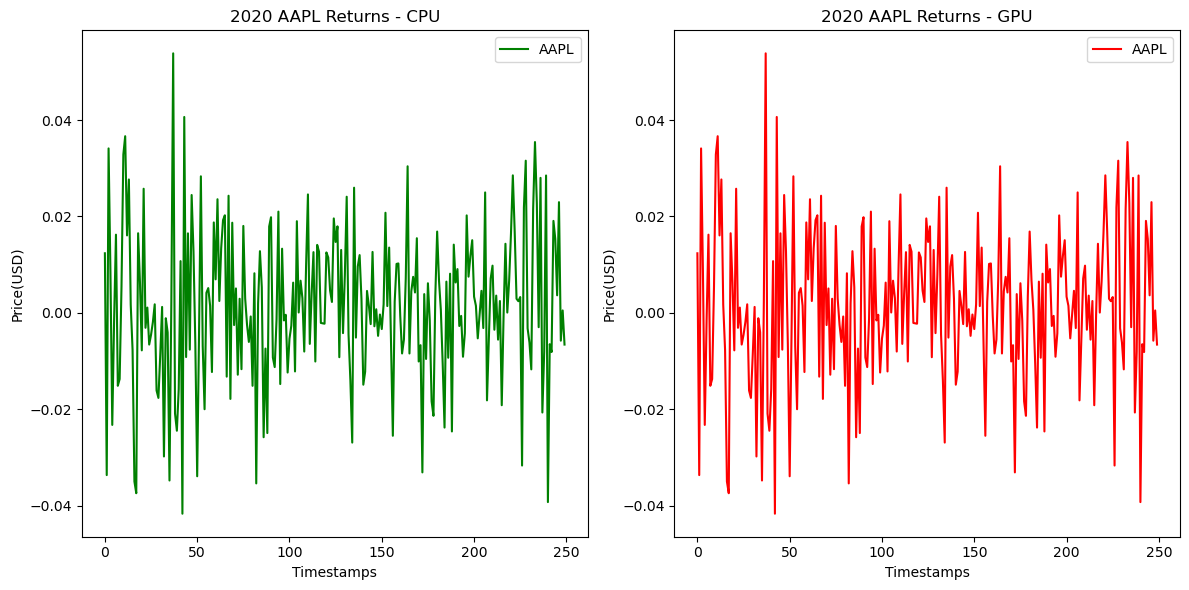

In [14]:
general_plot_func(cpu_returns[21].loc[:,['AAPL']],gpu_returns[21].loc[:,['AAPL']],'2020 AAPL Returns','Timestamps','Price(USD)')

In [15]:
def plot_correlation_heatmaps(cpu_corr_matrix, gpu_corr_matrix, title, xlabel, ylabel,vmin=-0.5,vmax=1):
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))  

    sns.heatmap(cpu_corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True, ax=axes[0],vmax=vmax,vmin=vmin)
    axes[0].set_title(f'{title} - CPU', fontsize=14)
    axes[0].set_xlabel(xlabel, fontsize=12)
    axes[0].set_ylabel(ylabel, fontsize=12)

    sns.heatmap(gpu_corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True, ax=axes[1],vmax=vmax,vmin=vmin)
    axes[1].set_title(f'{title} - GPU', fontsize=14)
    axes[1].set_xlabel(xlabel, fontsize=12)
    axes[1].set_ylabel(ylabel, fontsize=12)

    plt.tight_layout()
    plt.show()


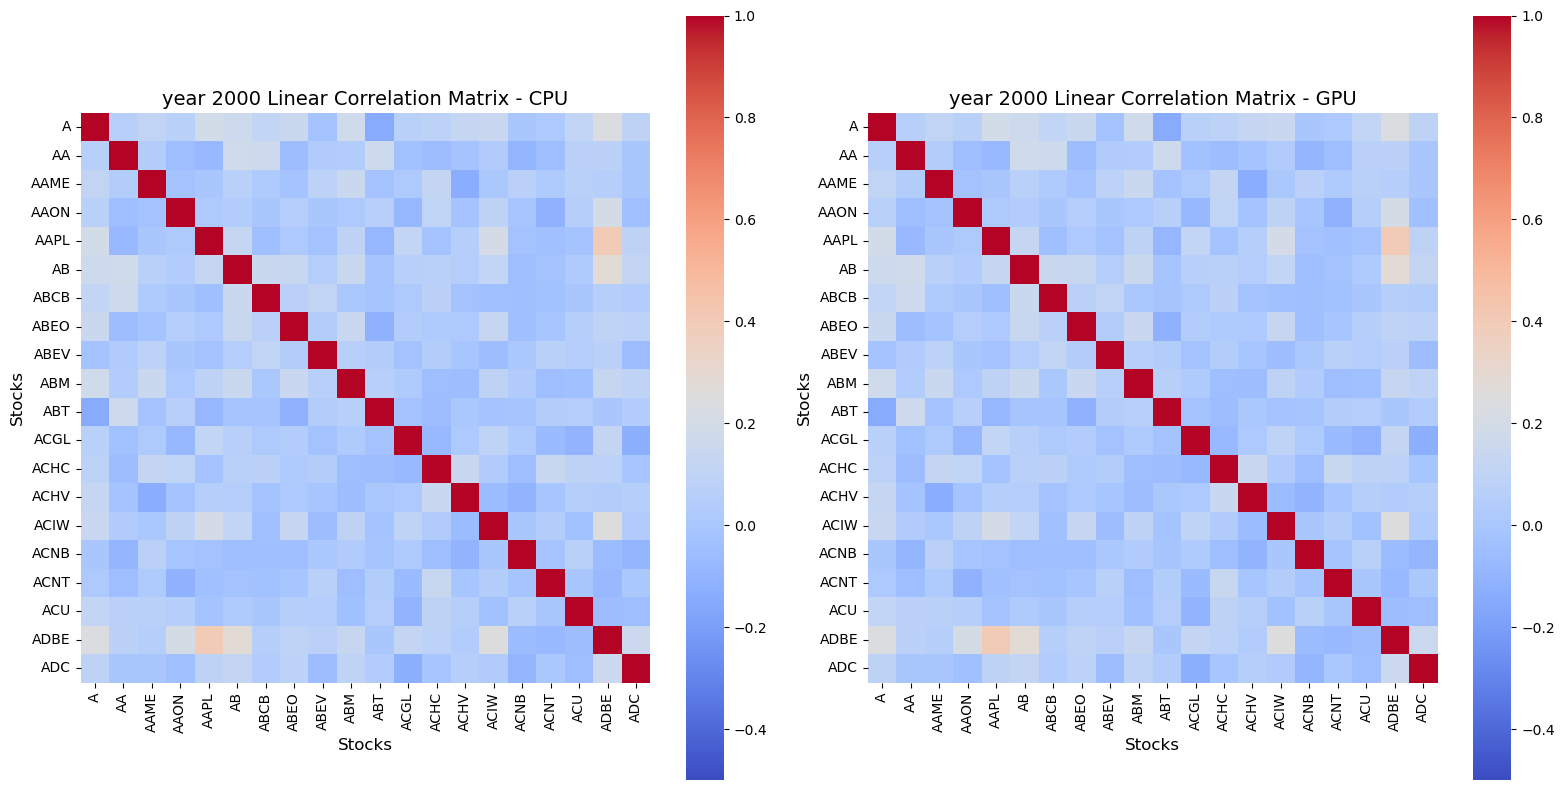

In [16]:
plot_correlation_heatmaps(cpu_linear_corr[0].iloc[0:20,0:20],gpu_linear_corr[0].iloc[0:20,0:20],'year 2000 Linear Correlation Matrix','Stocks','Stocks')

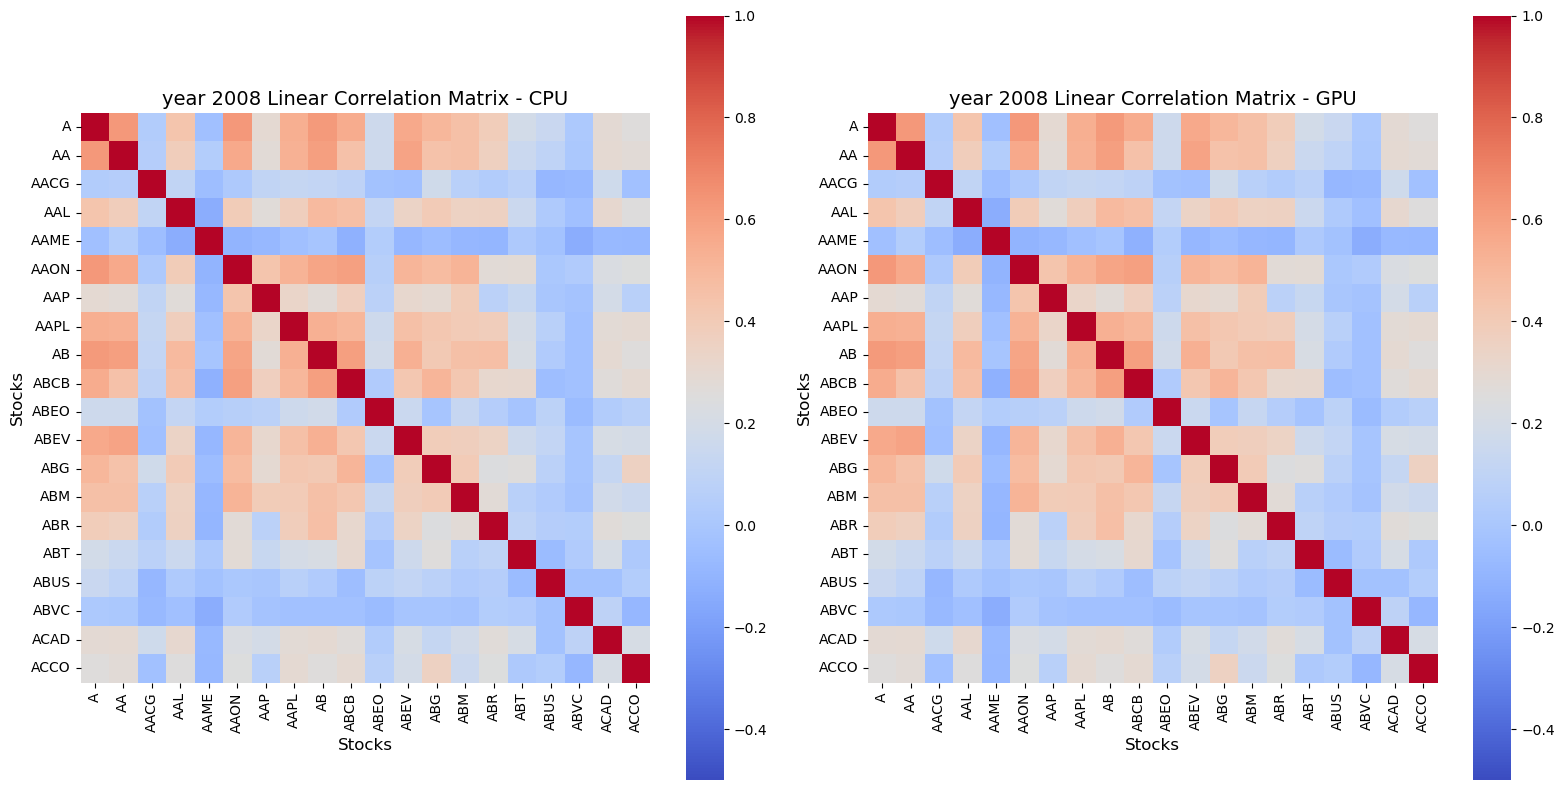

In [17]:
plot_correlation_heatmaps(cpu_linear_corr[9].iloc[0:20,0:20],gpu_linear_corr[9].iloc[0:20,0:20],'year 2008 Linear Correlation Matrix','Stocks','Stocks')

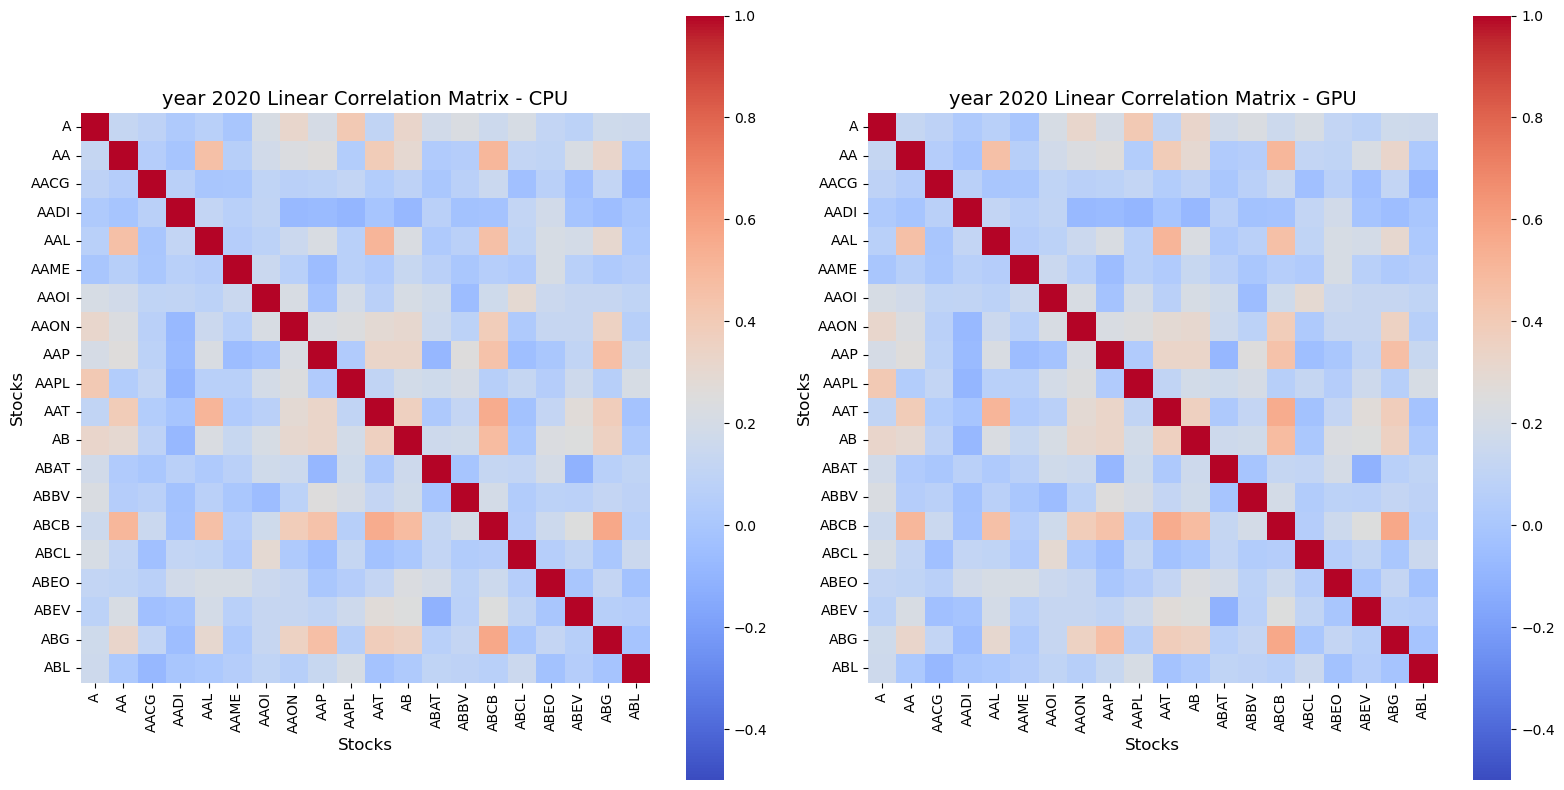

In [18]:
plot_correlation_heatmaps(cpu_linear_corr[21].iloc[0:20,0:20],gpu_linear_corr[21].iloc[0:20,0:20],'year 2020 Linear Correlation Matrix','Stocks','Stocks')

# COMPLEX NETWORK BASED ANALYSIS

In [19]:
import networkx as nx

In [20]:
data_list = []  # List of correlation matrices
for i in range(25):
    if cpu_linear_corr[i].shape[0]!=gpu_linear_corr[i].shape[0]:
        col = list(set(gpu_linear_corr[i].columns.tolist()) & set(cpu_linear_corr[i].columns.tolist()))
        data_list.append(cpu_linear_corr[i].loc[col,col])
    else:
        data_list.append(cpu_linear_corr[i])

average_corr = []
network_clustering = []
average_shortest_path = []
network_density = []
modularity = []

p = 0
for i in data_list:
    mean_corr = i.iloc[0:100, 0:100].mean().mean()
    p += 1
    print(f"Processing matrix {p}")
    
    adjacency_matrix = i.iloc[0:100, 0:100].copy()
    adjacency_matrix[adjacency_matrix >= mean_corr] = 1
    adjacency_matrix[adjacency_matrix < mean_corr] = 0
    
    G = nx.Graph(np.array(adjacency_matrix))
    
    if nx.is_connected(G):
        avg_shortest_path = nx.average_shortest_path_length(G)
        average_shortest_path.append(avg_shortest_path)
    else:
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        avg_paths = [nx.average_shortest_path_length(comp) for comp in components]

        weighted_avg_path = sum(
            len(comp.nodes) * nx.average_shortest_path_length(comp)
            for comp in components
        ) / len(G.nodes)
        average_shortest_path.append(weighted_avg_path)
    
    avg_clustering = nx.average_clustering(G)
    network_clustering.append(avg_clustering)
    
    average_corr.append(mean_corr)
    
    network_density.append(nx.density(G))
    
    partition = [list(component) for component in nx.connected_components(G)]
    modularity_value = nx.community.modularity(G, partition)
    modularity.append(modularity_value)



Processing matrix 1
Processing matrix 2
Processing matrix 3
Processing matrix 4
Processing matrix 5
Processing matrix 6
Processing matrix 7
Processing matrix 8
Processing matrix 9
Processing matrix 10
Processing matrix 11
Processing matrix 12
Processing matrix 13
Processing matrix 14
Processing matrix 15
Processing matrix 16
Processing matrix 17
Processing matrix 18
Processing matrix 19
Processing matrix 20
Processing matrix 21
Processing matrix 22
Processing matrix 23
Processing matrix 24
Processing matrix 25


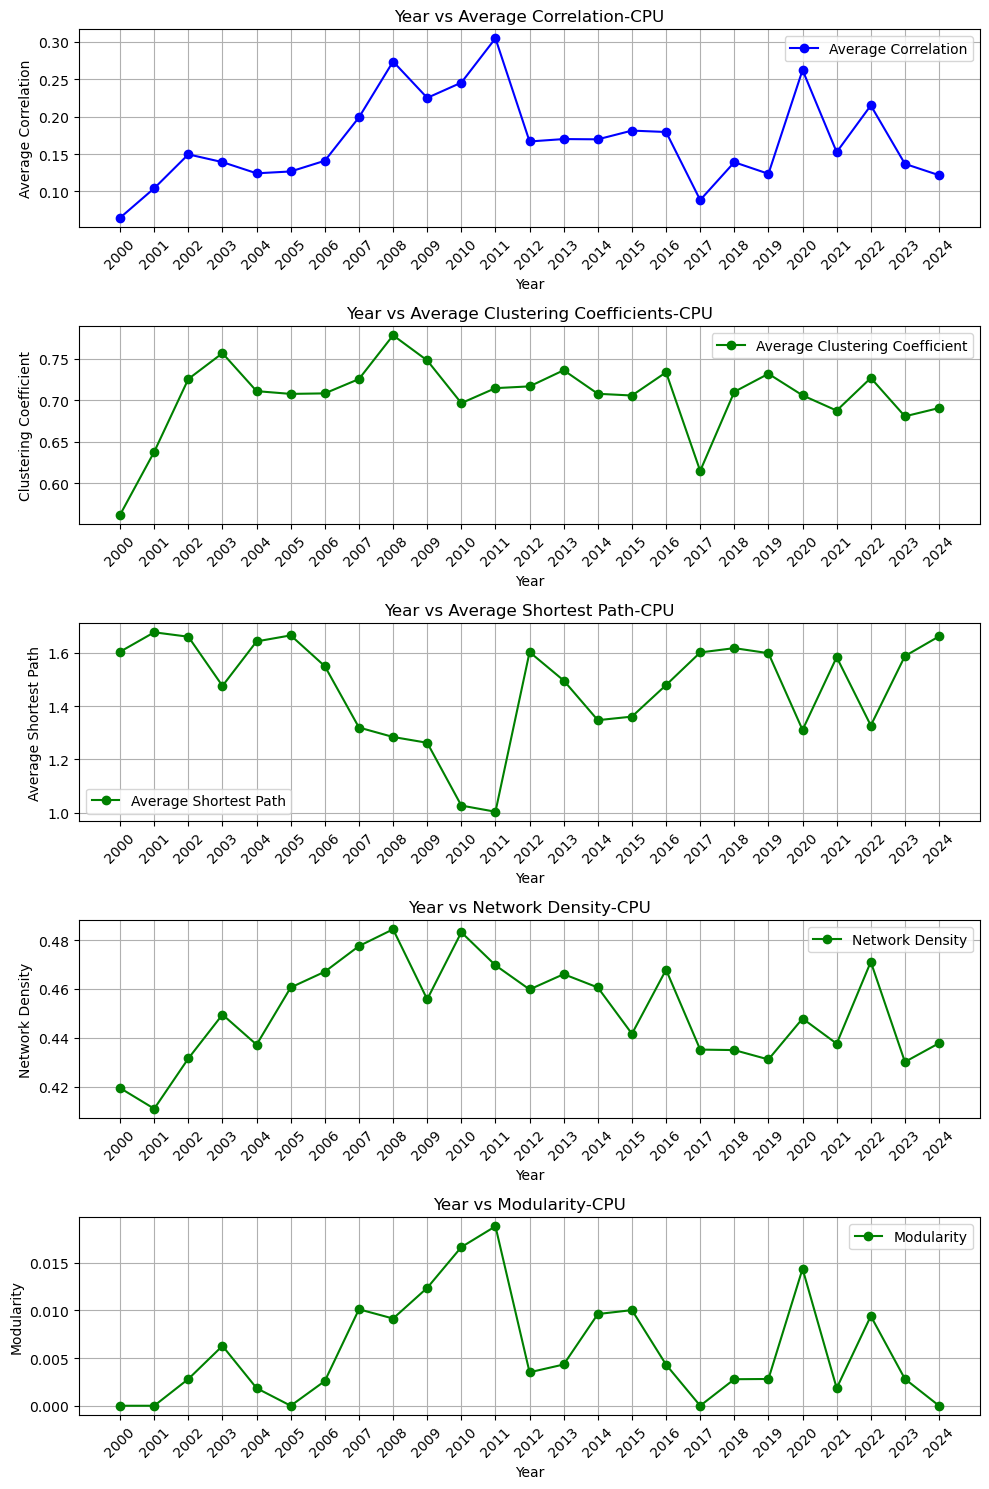

In [22]:
plt.figure(figsize=(10, 15))

plt.subplot(5, 1, 1)
plt.plot(years, average_corr, marker='o', label='Average Correlation', color='blue')
plt.xticks(years, rotation=45) 
plt.xlabel("Year")
plt.ylabel("Average Correlation")
plt.title("Year vs Average Correlation-CPU")
plt.legend()
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(years, network_clustering, marker='o', label='Average Clustering Coefficient', color='green')
plt.xticks(years, rotation=45) 
plt.xlabel("Year")
plt.ylabel("Clustering Coefficient")
plt.title("Year vs Average Clustering Coefficients-CPU")
plt.legend()
plt.grid(True)


plt.subplot(5, 1, 3)
plt.plot(years, average_shortest_path, marker='o', label='Average Shortest Path', color='green')
plt.xticks(years, rotation=45) 
plt.xlabel("Year")
plt.ylabel("Average Shortest Path")
plt.title("Year vs Average Shortest Path-CPU")
plt.legend()
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(years, network_density, marker='o', label='Network Density', color='green')
plt.xticks(years, rotation=45) 
plt.xlabel("Year")
plt.ylabel("Network Density")
plt.title("Year vs Network Density-CPU")
plt.legend()
plt.grid(True)


plt.subplot(5, 1, 5)
plt.plot(years, modularity, marker='o', label='Modularity', color='green')
plt.xticks(years, rotation=45)  
plt.xlabel("Year")
plt.ylabel("Modularity")
plt.title("Year vs Modularity-CPU")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


In [20]:
data_list = []  # List of correlation matrices
for i in range(25):
    if cpu_linear_corr[i].shape[0]!=gpu_linear_corr[i].shape[0]:
        col = list(set(gpu_linear_corr[i].columns.tolist()) & set(cpu_linear_corr[i].columns.tolist()))
        data_list.append(gpu_linear_corr[i].loc[col,col])
    else:
        data_list.append(gpu_linear_corr[i])
        

average_corr = []
network_clustering = []
average_shortest_path = []
network_density = []
modularity = []

p = 0
for i in data_list:
    mean_corr = i.iloc[0:100, 0:100].mean().mean()
    p += 1
    print(f"Processing matrix {p}")
    
    adjacency_matrix = i.iloc[0:100, 0:100].copy()
    adjacency_matrix[adjacency_matrix >= mean_corr] = 1
    adjacency_matrix[adjacency_matrix < mean_corr] = 0
    
    G = nx.Graph(np.array(adjacency_matrix))
    
    if nx.is_connected(G):
        avg_shortest_path = nx.average_shortest_path_length(G)
        average_shortest_path.append(avg_shortest_path)
    else:
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        avg_paths = [nx.average_shortest_path_length(comp) for comp in components]

        weighted_avg_path = sum(
            len(comp.nodes) * nx.average_shortest_path_length(comp)
            for comp in components
        ) / len(G.nodes)
        average_shortest_path.append(weighted_avg_path)
    
    avg_clustering = nx.average_clustering(G)
    network_clustering.append(avg_clustering)
    
    average_corr.append(mean_corr)
    
    network_density.append(nx.density(G))
    
    partition = [list(component) for component in nx.connected_components(G)]
    modularity_value = nx.community.modularity(G, partition)
    modularity.append(modularity_value)



Processing matrix 1
Processing matrix 2
Processing matrix 3
Processing matrix 4
Processing matrix 5
Processing matrix 6
Processing matrix 7
Processing matrix 8
Processing matrix 9
Processing matrix 10
Processing matrix 11
Processing matrix 12
Processing matrix 13
Processing matrix 14
Processing matrix 15
Processing matrix 16
Processing matrix 17
Processing matrix 18
Processing matrix 19
Processing matrix 20
Processing matrix 21
Processing matrix 22
Processing matrix 23
Processing matrix 24
Processing matrix 25


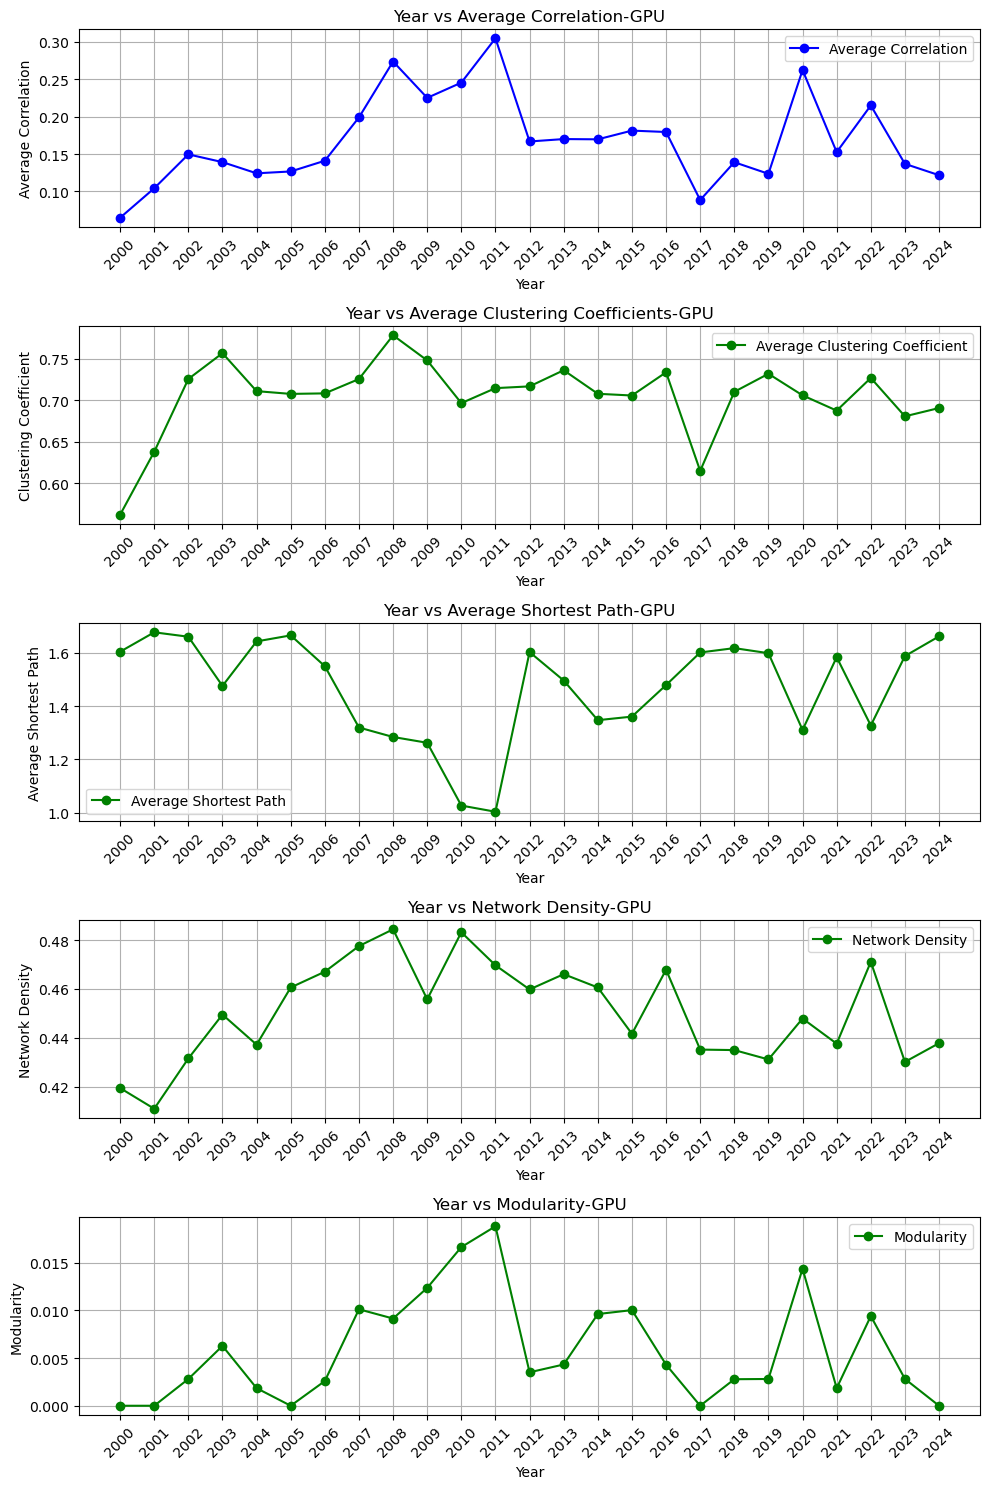

In [21]:
plt.figure(figsize=(10, 15))

plt.subplot(5, 1, 1)
plt.plot(years, average_corr, marker='o', label='Average Correlation', color='blue')
plt.xticks(years, rotation=45) 
plt.xlabel("Year")
plt.ylabel("Average Correlation")
plt.title("Year vs Average Correlation-GPU")
plt.legend()
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(years, network_clustering, marker='o', label='Average Clustering Coefficient', color='green')
plt.xticks(years, rotation=45)  
plt.xlabel("Year")
plt.ylabel("Clustering Coefficient")
plt.title("Year vs Average Clustering Coefficients-GPU")
plt.legend()
plt.grid(True)


plt.subplot(5, 1, 3)
plt.plot(years, average_shortest_path, marker='o', label='Average Shortest Path', color='green')
plt.xticks(years, rotation=45)  
plt.xlabel("Year")
plt.ylabel("Average Shortest Path")
plt.title("Year vs Average Shortest Path-GPU")
plt.legend()
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(years, network_density, marker='o', label='Network Density', color='green')
plt.xticks(years, rotation=45)
plt.xlabel("Year")
plt.ylabel("Network Density")
plt.title("Year vs Network Density-GPU")
plt.legend()
plt.grid(True)


plt.subplot(5, 1, 5)
plt.plot(years, modularity, marker='o', label='Modularity', color='green')
plt.xticks(years, rotation=45)  
plt.xlabel("Year")
plt.ylabel("Modularity")
plt.title("Year vs Modularity-GPU")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()
